# **Facial Expression Recognition Training Notebook**

## Import Packages

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2

## Load Training DataFrame

In [20]:
train = pd.read_csv('/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/train.csv')
print(train.shape)

(28709, 2)


In [21]:
train.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


## Label Distribution

In [22]:
emotion_prop = (train.emotion.value_counts() / len(train)).to_frame().sort_index(ascending=True)

emotion_prop

,emotion
0,0.139155
1,0.015187
2,0.142708
3,0.251315
4,0.168240
5,0.110453
6,0.172942


In [23]:
emotions = ['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']

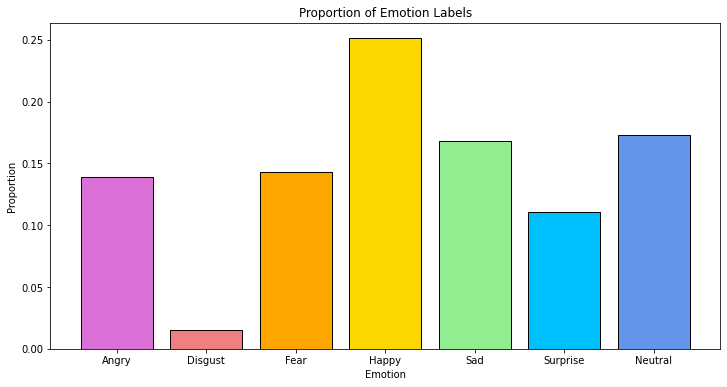

In [24]:
palette = ['orchid', 'lightcoral', 'orange', 'gold', 'lightgreen', 'deepskyblue', 'cornflowerblue']

plt.figure(figsize=[12,6])

plt.bar(x=emotions, height=emotion_prop['emotion'], color=palette, edgecolor='black')
    
plt.xlabel('Emotion')
plt.ylabel('Proportion')
plt.title('Proportion of Emotion Labels')
plt.show()

## View Sample of Images

In [25]:
def pixels_to_array(pixels):
    array = np.array(pixels.split(),'float64')
    return array

def image_reshape(data):
    image = np.reshape(data['pixels'].to_list(),(data.shape[0],48,48,1))
    return image

In [26]:
train['pixels'] = train['pixels'].apply(pixels_to_array)
X = image_reshape(train)
y = train['emotion']

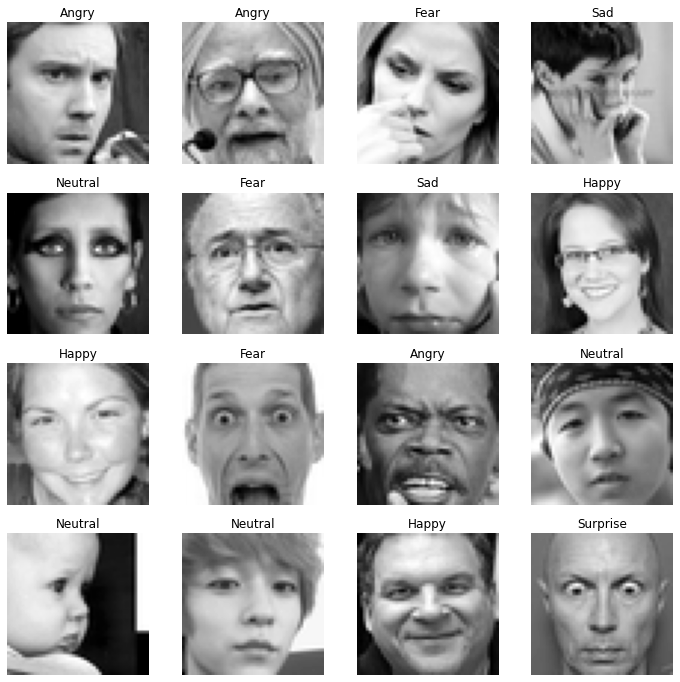

In [27]:
plt.figure(figsize=[12,12])
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X[i],cmap="gray")
    plt.title(emotions[y[i]])
    plt.axis("off")
plt.show()

## Split Data

In [28]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1)

In [29]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(22967, 48, 48, 1)
(22967,)
(5742, 48, 48, 1)
(5742,)


## Build Network

In [30]:
np.random.seed(1)
tf.random.set_seed(1)

cnn = Sequential([
    Conv2D(64, (3,3), activation = 'relu', padding = 'same', input_shape=(48,48,1)),
    Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
    MaxPooling2D(2,2),
    Dropout(0.25),
    BatchNormalization(),

    Conv2D(128, (3,3), activation = 'relu', padding = 'same'),
    Conv2D(128, (3,3), activation = 'relu', padding = 'same'),
    MaxPooling2D(2,2),
    Dropout(0.5),
    BatchNormalization(),
    
    Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
    Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
    MaxPooling2D(2,2),
    Dropout(0.5),
    BatchNormalization(),

    Flatten(),
    
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.25),
    BatchNormalization(),
    Dense(7, activation='softmax')
])

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 128)      

## Train Network

In [31]:
opt = tf.keras.optimizers.Adam(0.001)
cnn.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [32]:
%%time 

h1 = cnn.fit(
    X_train, y_train, 
    batch_size=256,
    epochs = 20,
    verbose = 1,
    validation_data = (X_valid, y_valid)
)

Epoch 1/20
90/90 [==============================] - 6s 55ms/step - loss: 2.2198 - accuracy: 0.1837 - val_loss: 5.7038 - val_accuracy: 0.1423
Epoch 2/20
90/90 [==============================] - 5s 52ms/step - loss: 1.9481 - accuracy: 0.2290 - val_loss: 1.8921 - val_accuracy: 0.2781
Epoch 3/20
90/90 [==============================] - 5s 52ms/step - loss: 1.8739 - accuracy: 0.2496 - val_loss: 1.7602 - val_accuracy: 0.2767
Epoch 4/20
90/90 [==============================] - 5s 52ms/step - loss: 1.8177 - accuracy: 0.2706 - val_loss: 1.7586 - val_accuracy: 0.2748
Epoch 5/20
90/90 [==============================] - 5s 52ms/step - loss: 1.7387 - accuracy: 0.3064 - val_loss: 1.6367 - val_accuracy: 0.3516
Epoch 6/20
90/90 [==============================] - 5s 54ms/step - loss: 1.6422 - accuracy: 0.3566 - val_loss: 1.6065 - val_accuracy: 0.3769
Epoch 7/20
90/90 [==============================] - 5s 52ms/step - loss: 1.5558 - accuracy: 0.3921 - val_loss: 1.5863 - val_accuracy: 0.3905
Epoch 8/20
90

In [33]:
history = h1.history
print(history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


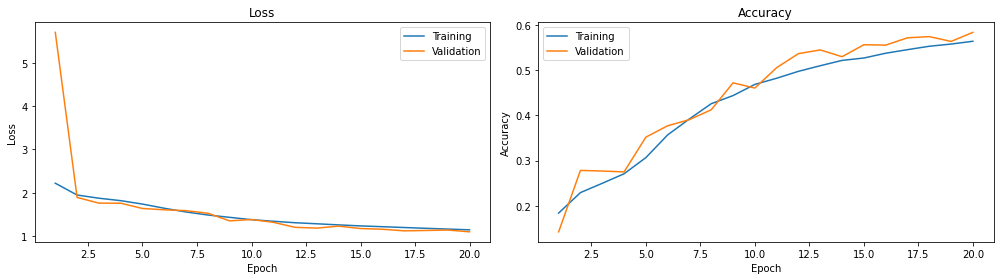

In [34]:
epoch_range = range(1, len(history['loss'])+1)

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(epoch_range, history['loss'], label='Training')
plt.plot(epoch_range, history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epoch_range, history['accuracy'], label='Training')
plt.plot(epoch_range, history['val_accuracy'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [35]:
tf.keras.backend.set_value(cnn.optimizer.learning_rate, 0.0001)

In [36]:
%%time 

h2 = cnn.fit(
    X_train, y_train, 
    batch_size=256,
    epochs = 20,
    verbose = 1,
    validation_data = (X_valid, y_valid)
)

Epoch 1/20
90/90 [==============================] - 5s 53ms/step - loss: 1.1146 - accuracy: 0.5758 - val_loss: 1.0580 - val_accuracy: 0.5996
Epoch 2/20
90/90 [==============================] - 5s 52ms/step - loss: 1.0946 - accuracy: 0.5847 - val_loss: 1.0551 - val_accuracy: 0.5967
Epoch 3/20
90/90 [==============================] - 5s 52ms/step - loss: 1.0868 - accuracy: 0.5884 - val_loss: 1.0518 - val_accuracy: 0.6003
Epoch 4/20
90/90 [==============================] - 5s 52ms/step - loss: 1.0775 - accuracy: 0.5934 - val_loss: 1.0414 - val_accuracy: 0.6062
Epoch 5/20
90/90 [==============================] - 5s 54ms/step - loss: 1.0787 - accuracy: 0.5920 - val_loss: 1.0419 - val_accuracy: 0.6036
Epoch 6/20
90/90 [==============================] - 5s 52ms/step - loss: 1.0717 - accuracy: 0.5917 - val_loss: 1.0389 - val_accuracy: 0.6068
Epoch 7/20
90/90 [==============================] - 5s 53ms/step - loss: 1.0691 - accuracy: 0.5999 - val_loss: 1.0317 - val_accuracy: 0.6111
Epoch 8/20
90

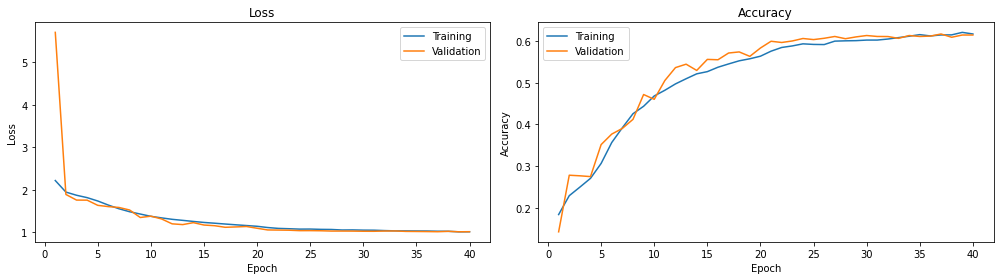

In [37]:
for k in history.keys():
    history[k] += h2.history[k]

epoch_range = range(1, len(history['loss'])+1)

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(epoch_range, history['loss'], label='Training')
plt.plot(epoch_range, history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epoch_range, history['accuracy'], label='Training')
plt.plot(epoch_range, history['val_accuracy'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

## Save Model and History

In [38]:
cnn.save('fer_model_v01.h5')
pickle.dump(history, open(f'fer_v01.pkl', 'wb'))

In [42]:
print(X_train[0].shape)
print(type(y_train),type(X_train[0]))#,y_train[0])
temp = cnn.predict(X_train[0].reshape((1,48,48,1)))
# print(temp)
# print(temp[0].index(max(temp[0])))
# plt.imshow(X[0],cmap="gray")
# plt.show()

(48, 48, 1)
<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>


In [40]:
from sklearn.model_selection import KFold
import numpy as np
num_folds = 10